In [ ]:
!nvidia-smi

Wed Dec 20 20:16:33 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from ultralytics import YOLO
from IPython.display import Image, display

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1fFRR2hYgIwagUxr6T1X")
project = rf.workspace("udg-bee2z").project("taktika-matematika")
dataset = project.version(3).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Taktika-matematika-3 in yolov8:: 100%|██████████| 2088/2088 [00:00<00:00, 8214.64it/s]


In [ ]:
%cd {HOME}

/content


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=500 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/Taktika-matematika-3/data.yaml, epochs=30, patience=50, batch=16, imgsz=500, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


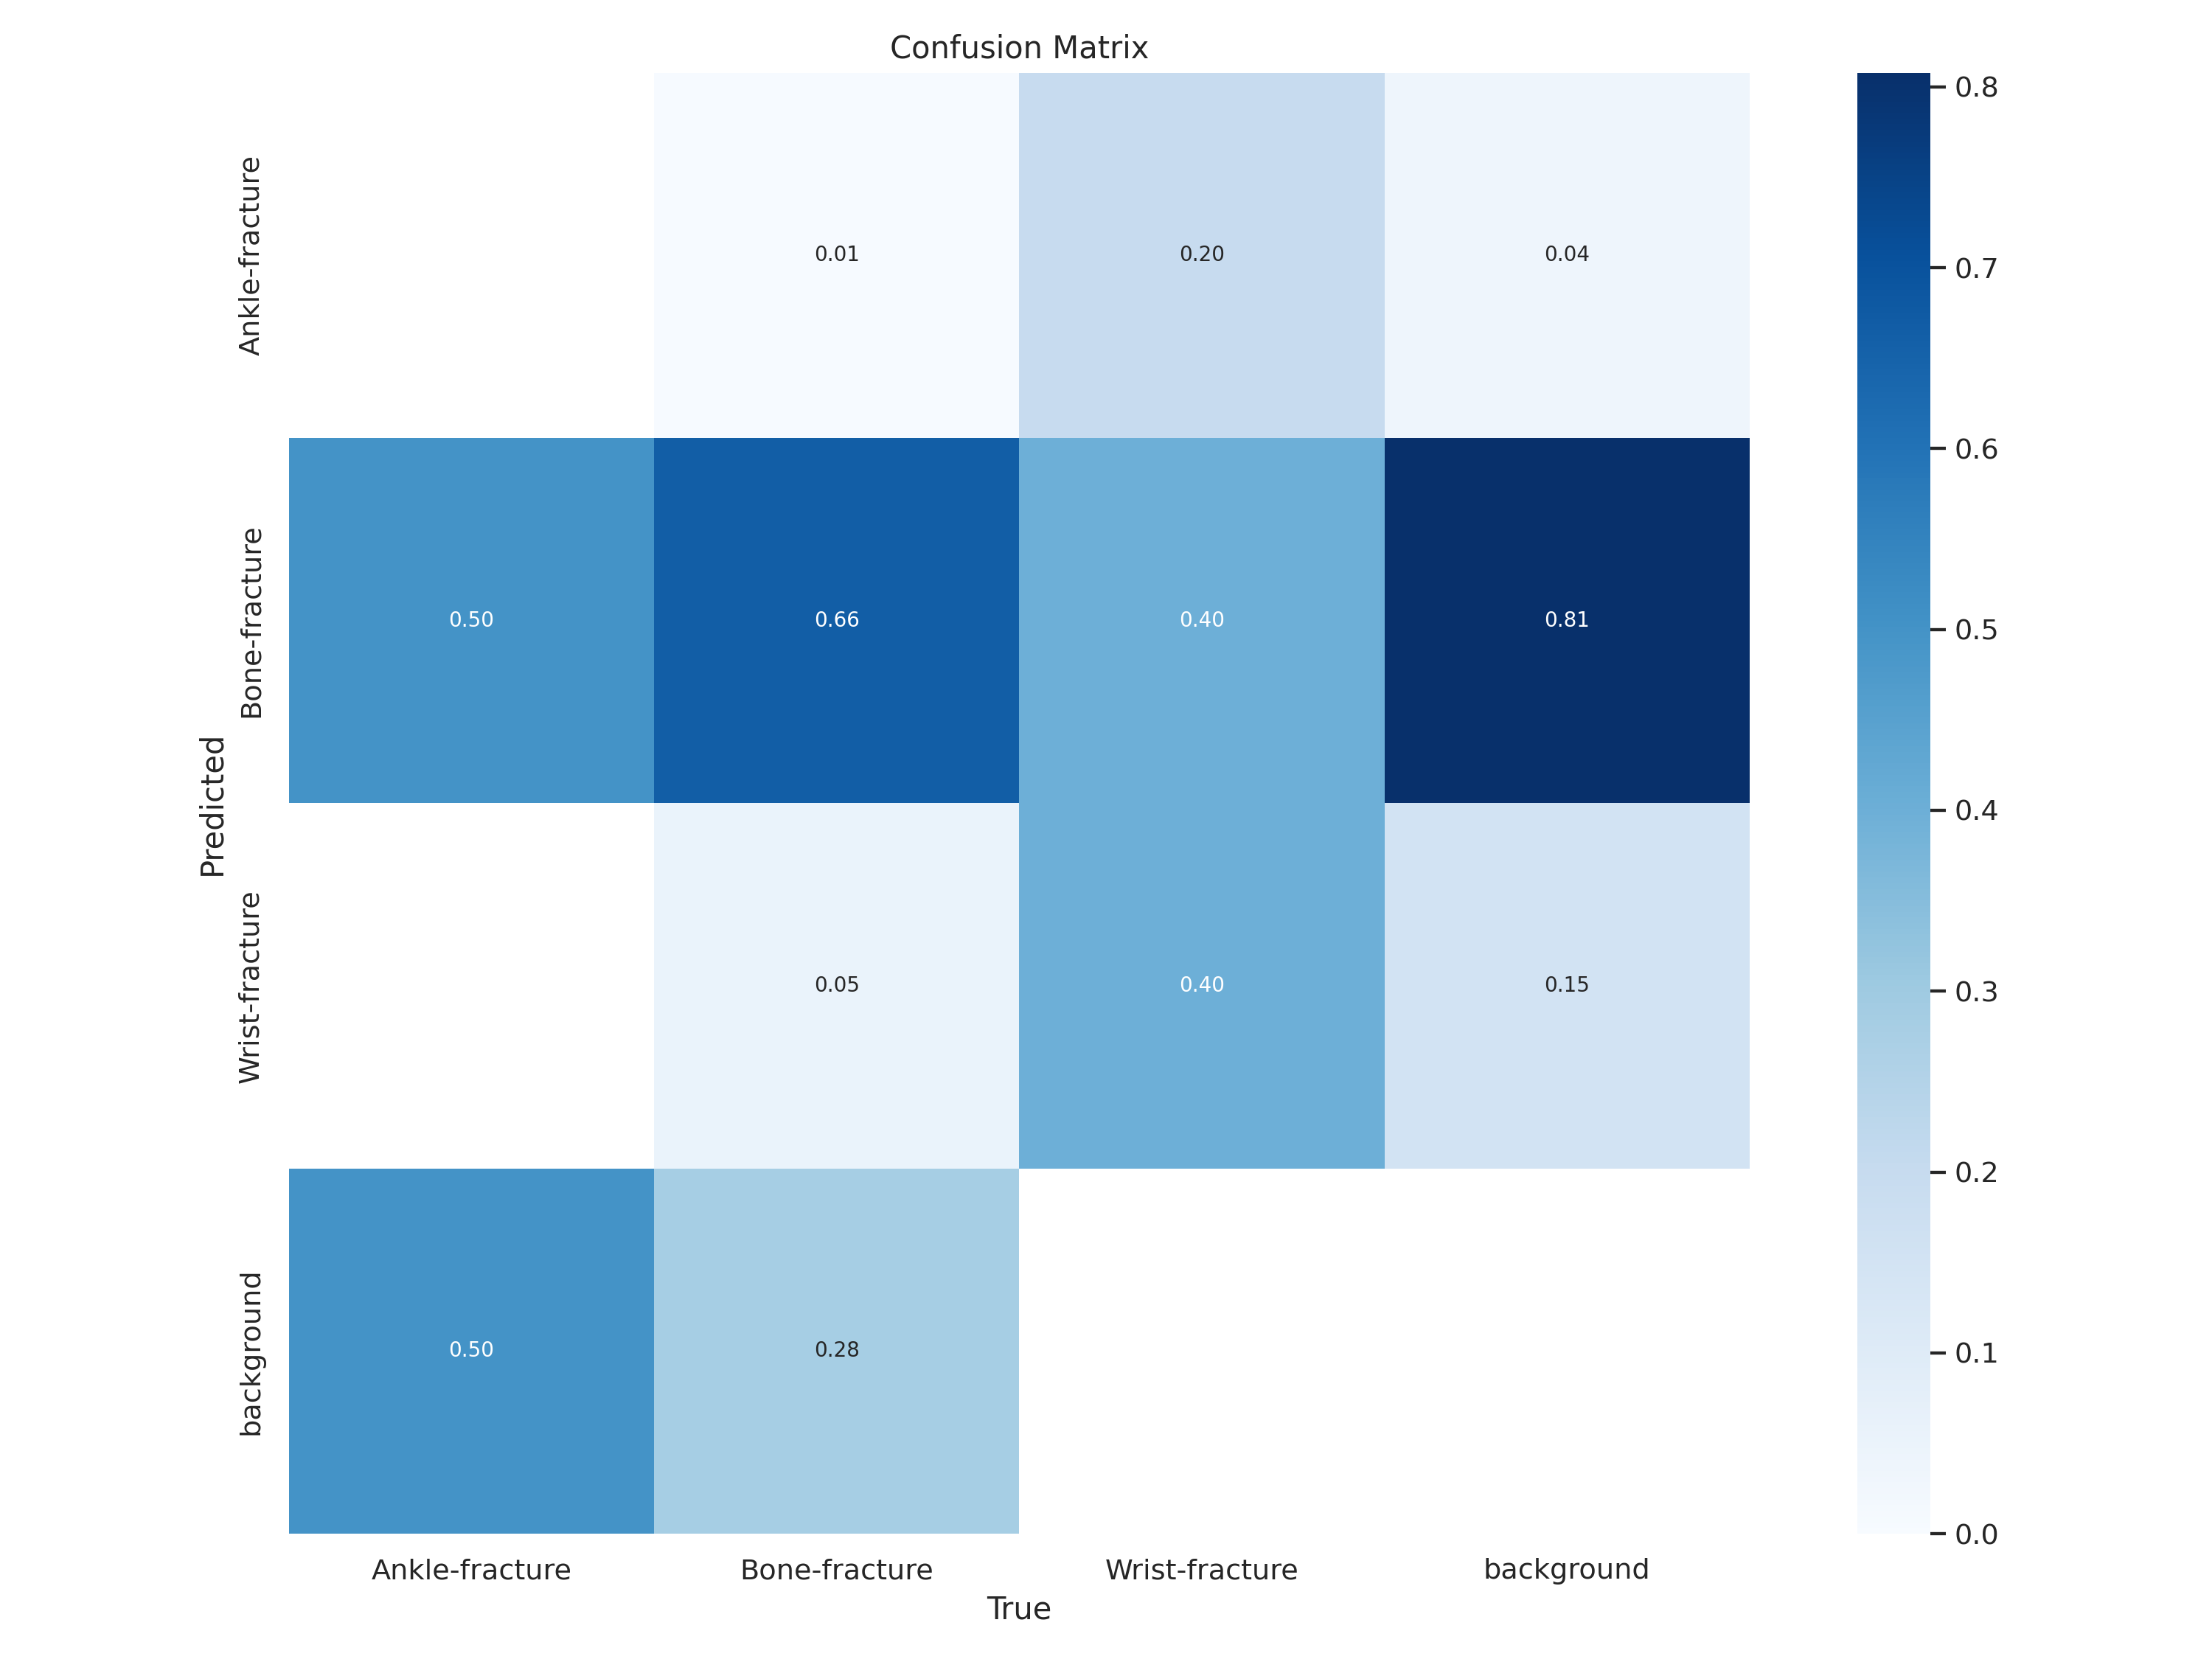

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png',width=600)

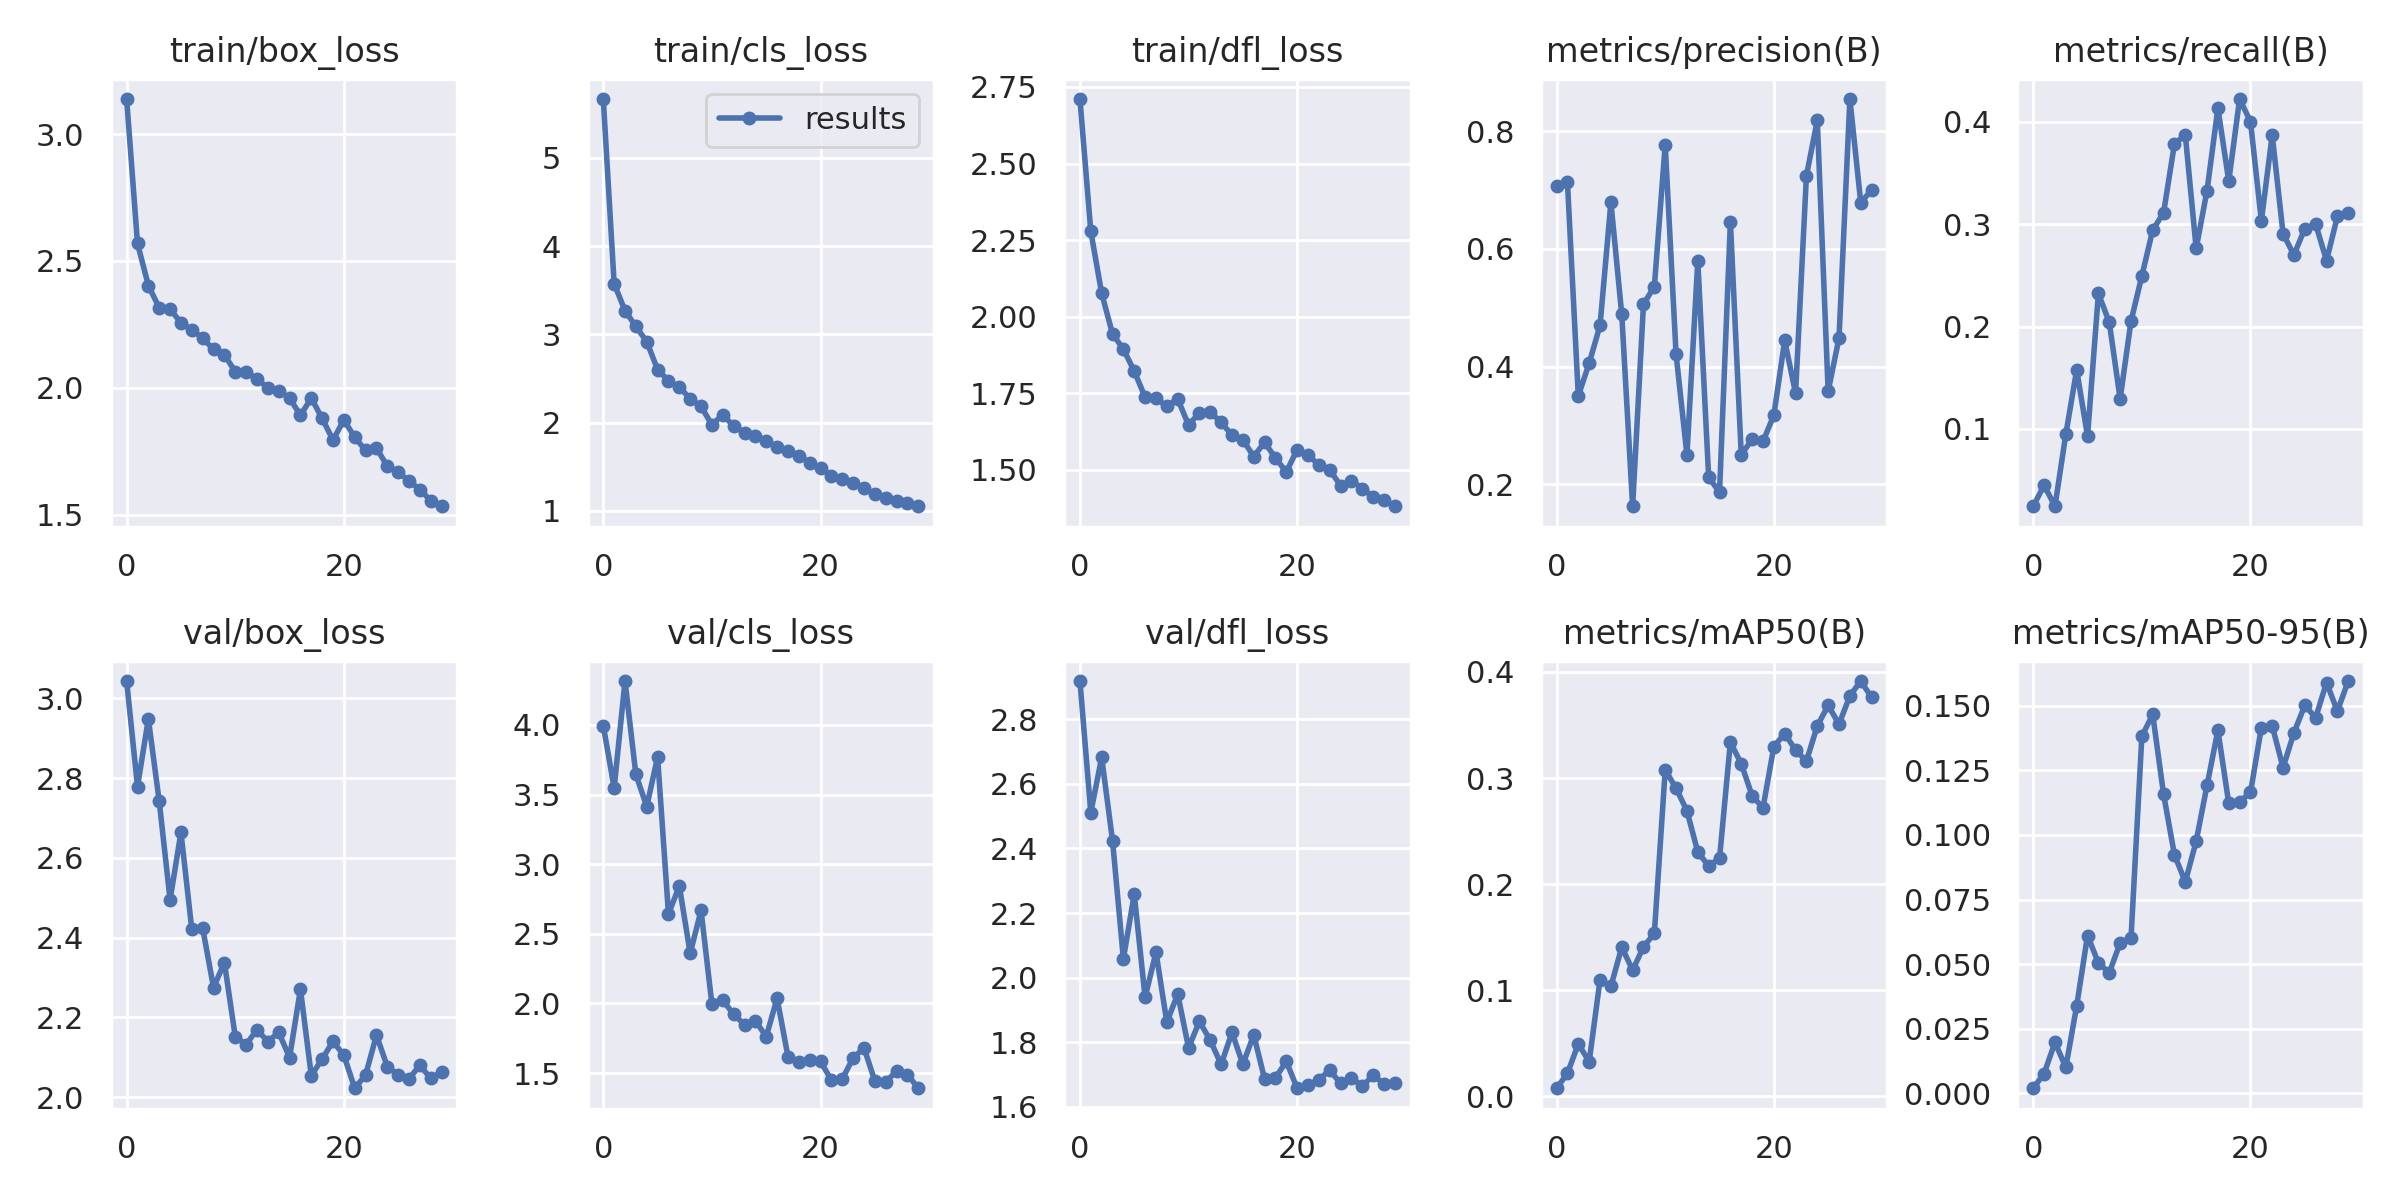

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png',width=600)

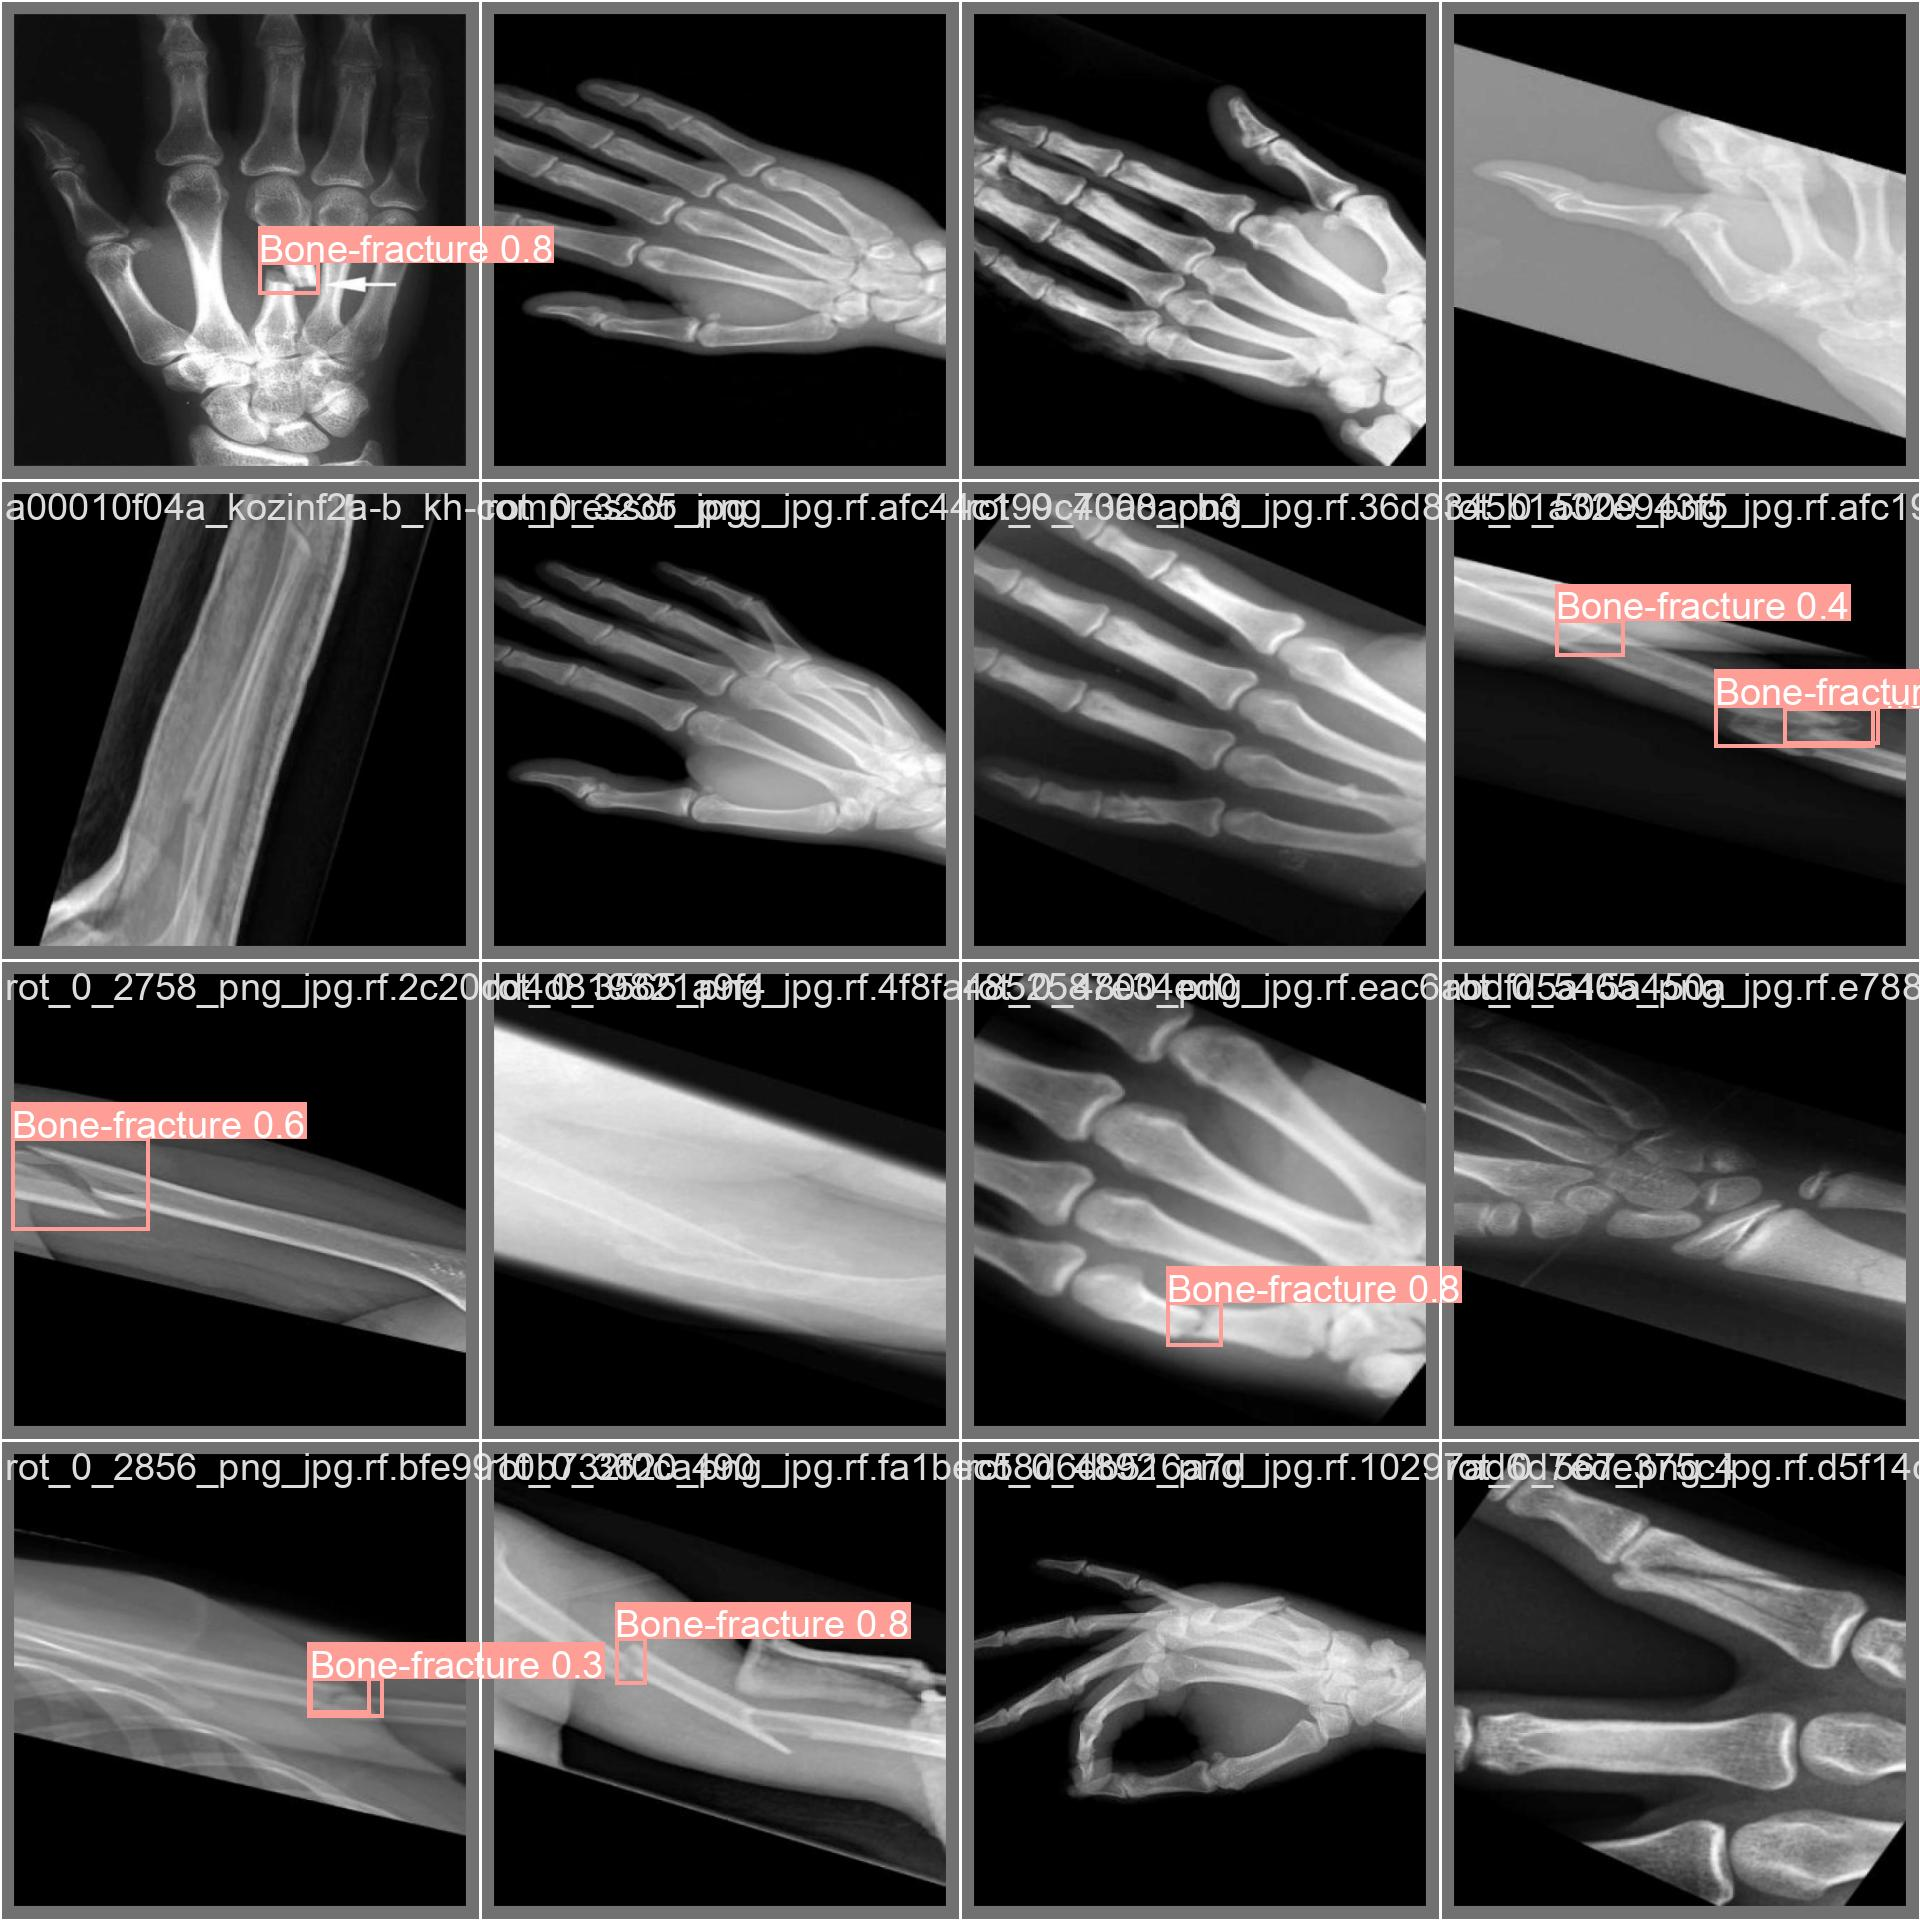

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg',width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

2023-12-20 11:37:36.106797: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 11:37:36.106852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 11:37:36.108648: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 11:37:37.563148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Taktika-matematika-3/valid/labels.cache..

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

2023-12-20 11:38:05.488021: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 11:38:05.488071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 11:38:05.489364: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 11:38:06.503554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/209 /content/datasets/Taktika-matematika-3/test/images/AP10994588

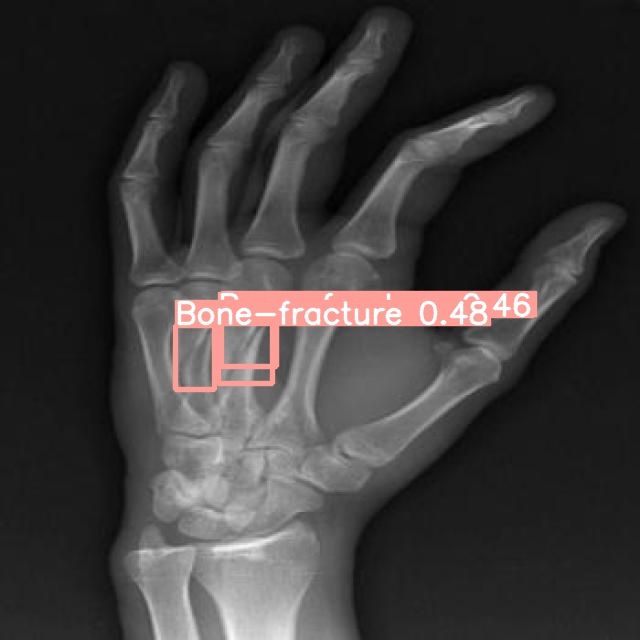

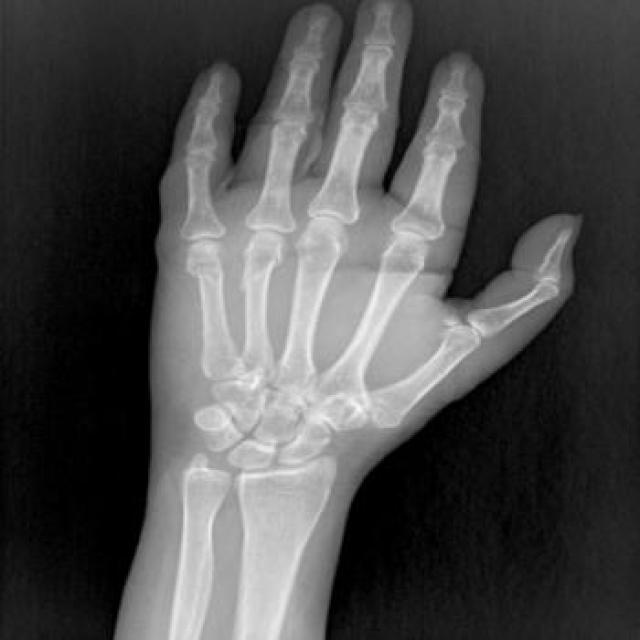

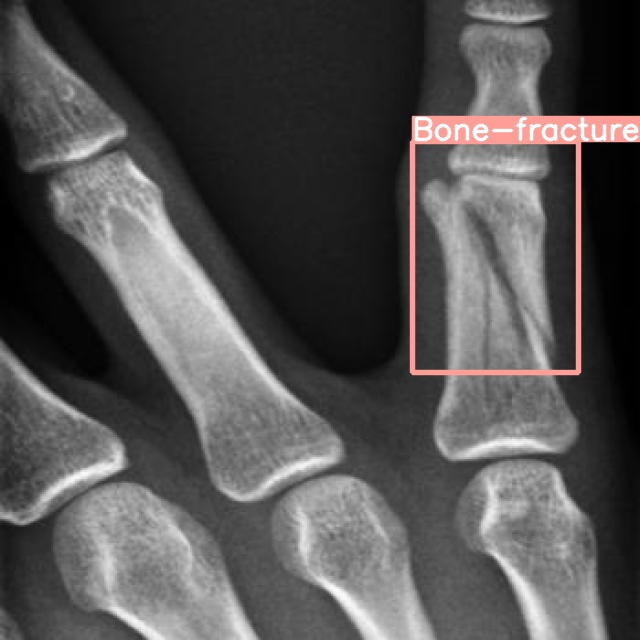

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!ls


datasets  runs	yolov8s.pt


In [ ]:
import torch
from pathlib import Path

model_path = os.path.abspath('yolov8s.pt')
img_path = os.path.abspath('/content/datasets/Taktika-matematika-3/test/images/all_0_2326_png_jpg.rf.2b7e21c61cff0f2d13cb4ec53411629f.jpg')
model = torch.hub.load('ultralytics/yolov5:v5.0', 'yolov8s.pt', path=model_path, force_reload=True)


In [ ]:
for name, param in model.state_dict().items():
    print(f'{name}: {param.size()}')

model.0.conv.weight: torch.Size([32, 3, 3, 3])
model.0.conv.bias: torch.Size([32])
model.1.conv.weight: torch.Size([64, 32, 3, 3])
model.1.conv.bias: torch.Size([64])
model.2.cv1.conv.weight: torch.Size([64, 64, 1, 1])
model.2.cv1.conv.bias: torch.Size([64])
model.2.cv2.conv.weight: torch.Size([64, 96, 1, 1])
model.2.cv2.conv.bias: torch.Size([64])
model.2.m.0.cv1.conv.weight: torch.Size([32, 32, 3, 3])
model.2.m.0.cv1.conv.bias: torch.Size([32])
model.2.m.0.cv2.conv.weight: torch.Size([32, 32, 3, 3])
model.2.m.0.cv2.conv.bias: torch.Size([32])
model.3.conv.weight: torch.Size([128, 64, 3, 3])
model.3.conv.bias: torch.Size([128])
model.4.cv1.conv.weight: torch.Size([128, 128, 1, 1])
model.4.cv1.conv.bias: torch.Size([128])
model.4.cv2.conv.weight: torch.Size([128, 256, 1, 1])
model.4.cv2.conv.bias: torch.Size([128])
model.4.m.0.cv1.conv.weight: torch.Size([64, 64, 3, 3])
model.4.m.0.cv1.conv.bias: torch.Size([64])
model.4.m.0.cv2.conv.weight: torch.Size([64, 64, 3, 3])
model.4.m.0.cv2.c

In [ ]:
#Pregled težina i bias-a
from models.experimental import attempt_load


model_path = 'yolov8s.pt'


model = attempt_load(model_path, map_location=torch.device('cuda'))
model_parameters = model.state_dict()


conv1_weights = model_parameters['model.21.m.0.cv1.conv.weight']
conv1_biases = model_parameters['model.21.m.0.cv1.conv.bias']
print(conv1_weights)
print(conv1_biases)


YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs


tensor([[[[-2.55611e-02, -3.04551e-02,  1.23715e-02],
          [-2.25758e-02,  6.06824e-04, -2.53171e-02],
          [ 2.80870e-02,  7.46308e-02, -4.82804e-02]],

         [[ 1.48723e-03,  1.70503e-02, -2.19407e-03],
          [-3.01035e-03,  1.32757e-02,  1.07138e-02],
          [-2.47573e-02, -3.30636e-03,  1.33761e-02]],

         [[ 5.23492e-03,  1.31537e-02, -3.91812e-02],
          [ 1.84424e-02,  6.72395e-03, -2.26619e-02],
          [-2.17075e-03, -1.01362e-04, -2.75990e-02]],

         ...,

         [[ 3.44809e-03,  6.42256e-03,  1.58734e-02],
          [-2.04661e-02, -3.48181e-02, -1.65192e-02],
          [-1.50123e-02, -8.75477e-03, -1.91887e-02]],

         [[-2.49367e-04,  1.23858e-02,  5.52196e-03],
          [-2.17865e-02, -1.25437e-02,  3.12301e-02],
          [ 1.39000e-02,  3.55645e-02,  3.83201e-02]],

         [[ 9.73071e-03,  4.54674e-02, -1.67345e-02],
          [ 6.61990e-03, -8.21657e-03, -2.91634e-02],
          [-2.70824e-02, -3.85784e-02, -1.70646e-02]]],

